1. **Створити програму для генерації довільного масиву із 42 цілих додатних чисел,
які не перевищують по модулю 199, з наступними властивостями:**  
    1.1. При кожному запуску програми масив повинен бути різним.   
    1.2. Масив повинен містити 40 відсотків елементів із інтервалу [101, 199].  
    1.3. Масив повинен містити 30 відсотків нульових елементів (розташованих в довільних місцях)  


In [ ]:
import random

numbers = []
N = 42
for i in range(N):
    numbers.append(
        random.choices(
            [random.randint(101, 199), 0, random.randint(0, 100)],
            [0.4, 0.3, 0.3]
        )[0]
    )

print(numbers)
zeros = len([n for n in numbers if n == 0])
bigger = len([n for n in numbers if n > 100])
smaller = len([n for n in numbers if n < 100 and n != 0])
print(f"Zeros: {zeros} ({zeros/N*100:.2f}%)")
print(f"Bigger than 100: {bigger} ({bigger/N*100:.2f}%)")
print(f"Smaller than 100: {smaller} ({smaller/N*100:.2f}%)")


[78, 79, 106, 24, 52, 115, 2, 108, 2, 191, 93, 16, 0, 55, 164, 36, 112, 130, 70, 54, 178, 0, 14, 24, 0, 0, 0, 0, 118, 0, 11, 0, 0, 0, 0, 76, 154, 126, 73, 0, 0, 58]
Zeros: 13 (30.95%)
Bigger than 100: 11 (26.19%)
Smaller than 100: 18 (42.86%)


2. **Зберегти згенерований масив в файл**

In [233]:
with open("numbers.txt", "w") as f:
    f.write(" ".join(map(str, numbers)))

3. **Створити програму, яка зчитує із файлу згенерований масив попередньою програмою і виводить його на екран.**

In [234]:
with open("numbers.txt", "r") as f:
    numbers = list(map(int, f.read().split()))

print(numbers)

[78, 79, 106, 24, 52, 115, 2, 108, 2, 191, 93, 16, 0, 55, 164, 36, 112, 130, 70, 54, 178, 0, 14, 24, 0, 0, 0, 0, 118, 0, 11, 0, 0, 0, 0, 76, 154, 126, 73, 0, 0, 58]


4. **Візуалізувати масив за допомогою стовпчастої горизонтальної діаграми. Виділити кольором
максимальні та мінімальні елементи, а також вказати їх значення на діаграмі. Виділити іншим
кольором елементи із інтервалу [101, 199].**

Text(12, 0, '0')

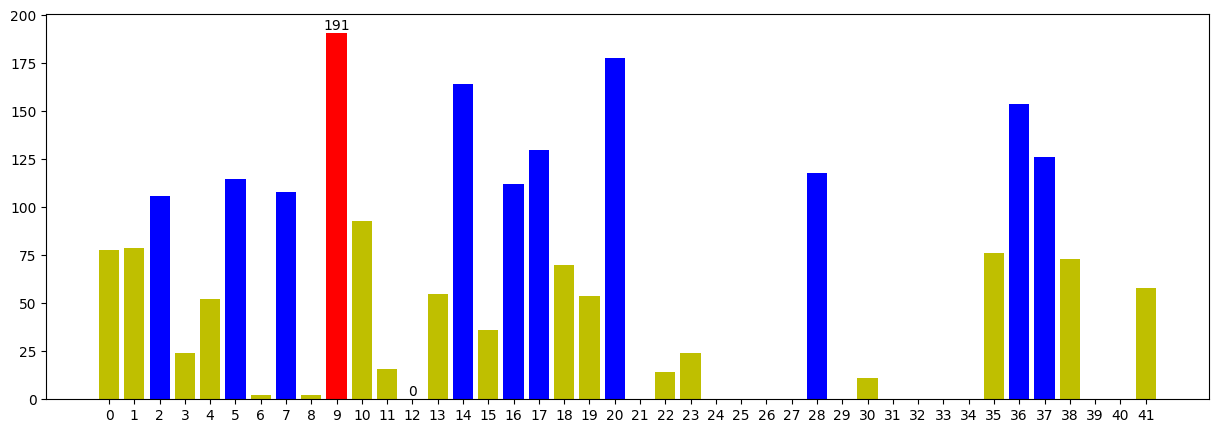

In [235]:
from matplotlib import pyplot as plt

max_value = max(numbers)
min_value = min(numbers)
max_index = numbers.index(max_value)
min_index = numbers.index(min_value)
colors = []
for i in range(N):
    if i == max_index:
        colors.append('r')
    elif i == min_index:
        colors.append('g')
    elif numbers[i] >= 101:
        colors.append('b')
    else:
        colors.append('y')

plt.figure(figsize=(15, 5))
plt.xticks(range(N))
plt.bar(range(N), numbers, color=colors)
plt.text(max_index, max_value, str(max_value), ha='center', va='bottom')
plt.text(min_index, min_value, str(min_value), ha='center', va='bottom')


5. **Порахувати суму та кількість елементів масиву, розташованих між його максимальним та
мінімальним елементами.**

In [236]:
sum_between = sum(numbers[min_index+1:max_index])
count_between = len(numbers[min_index+1:max_index])
print(f"Sum between: {sum_between}")
print(f"Count between: {count_between}")

Sum between: 0
Count between: 0


6. **Порахувати добуток елементів масиву, розташованих до першого нульового елемента.**

In [237]:
product_before = 0 if min_index == 0 else 1
for i in range(min_index):
    product_before *= numbers[i]

print(f"Product of numbers before first zero: {product_before}")

Product of numbers before first zero: 11509594689604976640


7. **Відсортувати за зростанням всі елементи, що стоять на парних місцях, та за збиванням елементи,
які стоять на непарних місцях. Вивести отриманий масив та його графічну діаграму на екран.
Виділити кольором елементи на непарних місцях, та іншим кольором на парних місцях.**

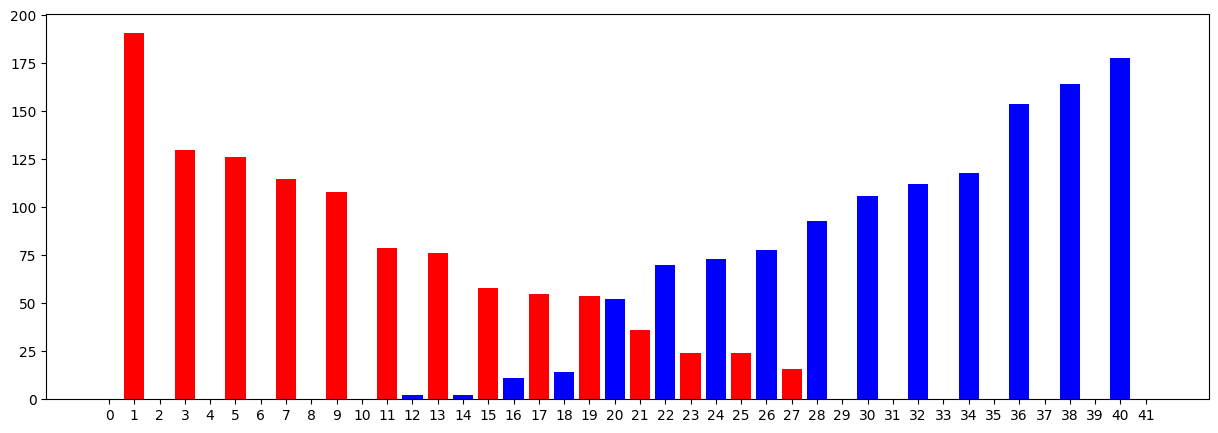

[0, 191, 0, 130, 0, 126, 0, 115, 0, 108, 0, 79, 2, 76, 2, 58, 11, 55, 14, 54, 52, 36, 70, 24, 73, 24, 78, 16, 93, 0, 106, 0, 112, 0, 118, 0, 154, 0, 164, 0, 178, 0]


In [238]:
even = sorted([n for i, n in enumerate(numbers) if i % 2 == 0])
odd = sorted([n for i, n in enumerate(numbers) if i % 2 != 0], reverse=True)
sorted_numbers = []
for i in range(N):
    if i % 2 == 0:
        sorted_numbers.append(even.pop(0))
    else:
        sorted_numbers.append(odd.pop(0))

plt.figure(figsize=(15, 5))
plt.xticks(range(N))
plt.bar(range(N), sorted_numbers, color=['b' if i % 2 == 0 else 'r' for i in range(N)])
plt.show()
print(sorted_numbers)